In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import numpy as np
%matplotlib inline  

In [3]:
def draw(log_file):
    with open(log_file, "r") as f:
        logs = f.read()
    loss_dict = {}
    loss_dict['loss'] = np.array(re.findall(r'loss: ([\d\.]+)', logs)).astype(float)
    loss_dict['loss_box_reg'] = np.array(re.findall(r'loss_box_reg: ([\d\.]+)', logs)).astype(float)
    loss_dict['loss_classifier'] = np.array(re.findall(r'loss_classifier: ([\d\.]+)', logs)).astype(float)
    loss_dict['loss_objectness'] = np.array(re.findall(r'loss_objectness: ([\d\.]+)', logs)).astype(float)
    loss_dict['loss_rpn_box_reg'] = np.array(re.findall(r'loss_rpn_box_reg: ([\d\.]+)', logs)).astype(float)
    df = pd.DataFrame(loss_dict)
    df = df.reset_index()    
    fig=plt.figure(figsize=(15, 15))
    ax=fig.add_subplot(1, 1, 1)
    sns.regplot(data=df, x="index", y="loss", label="loss")
    sns.regplot(data=df, x="index", y="loss_box_reg", label="loss_box_reg")
    sns.regplot(data=df, x="index", y="loss_classifier", label="loss_classifier")
    sns.regplot(data=df, x="index", y="loss_objectness", label="loss_objectness")
    sns.regplot(data=df, x="index", y="loss_rpn_box_reg", label="loss_rpn_box_reg")
    ax.legend(loc="best")
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

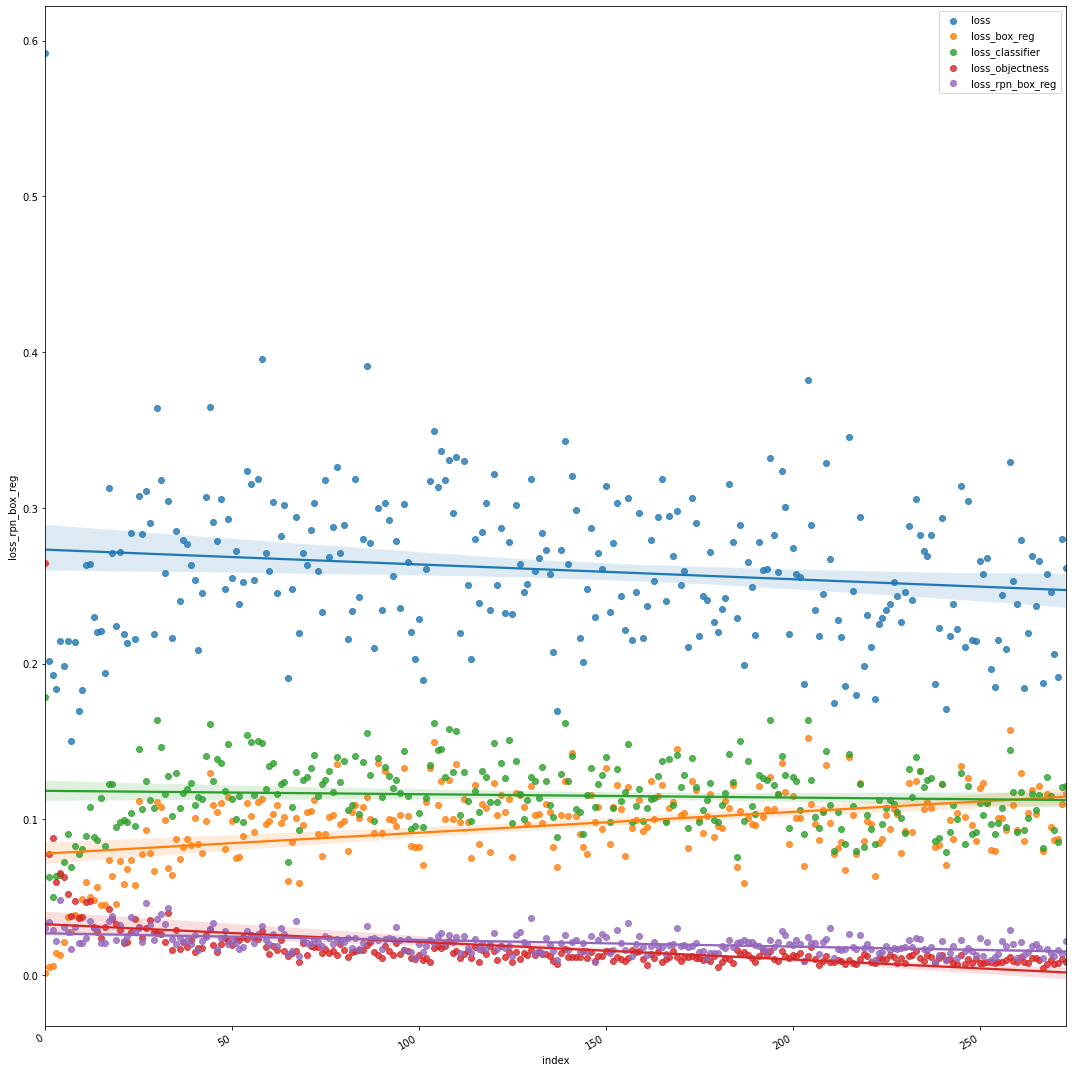

In [16]:
draw("../tiny_benchmark/outputs/tiny_set/FPN/R50_4u_10e_z2h/log.txt")

In [18]:
import json
with open('../tiny_benchmark/outputs/tiny_set/FPN/R50_4u_10e_z2h/inference/tiny_set_corner_sw640_sh512_test_all_coco/bbox_merge_nms0.5.json') as json_file:
    data = json.load(json_file)

In [21]:
det_file_path = '../tiny_benchmark/outputs/tiny_set/FPN/R50_4u_10e_z2h/inference/tiny_set_corner_sw640_sh512_test_all_coco/bbox_merge_nms0.5.json'

In [27]:
import os.path
import tempfile
import zipfile
with tempfile.SpooledTemporaryFile() as tmp:
    with zipfile.ZipFile(tmp, 'w', zipfile.ZIP_DEFLATED) as archive:
        archive.write(det_file_path, "{}_{}".format(0, os.path.basename(det_file_path)))
    tmp.seek(0)
        #neptune.send_artifact(tmp, "{}.zip".format(it))